# Collecting and Using Data in Python

## Laila A. Wahedi, PhD
### Massive Data Institute Postdoctoral Fellow <br>McCourt School of Public Policy<br>

### Follow along: 
* Slides: http://Wahedi.us, Current Presentation
* Interactive Notebook: https://notebooks.azure.com/Laila/libraries/MDI-workshopFA18

# Follow Along

1. Go to https://notebooks.azure.com/Laila/libraries/MDI-workshopFA18
2. Clone the directory

<img src='step1.png'>

# Follow Along
3. Sign in with any Microsoft Account (Hotmail, Outlook, Azure, etc.)
 * Create a folder to put it in, mark as private or public
 
<img src='step2.png'>

# Follow Along
4. Open a notebook
  * Open *this* notebook to have the code to play with
  * Open a blank notebook to follow along and try on your own. 
  
<img src='step4.png'>

# Do you get this error? 

### HTTP Error 400. The size of the request headers is too long

# Clear your cookies then refresh the browser. 

# Your Environment
* Jupyter Notebook Hosted in Azure
* Want to install it at home? 
  * Install the Anaconda distribution of Python
  https://www.anaconda.com/download/
  * Install Jupyter Notebooks
  http://jupyter.org/install

# Your Environment
* ctrl/apple+ enter runs a cell 

<img src='notebook.png'>

# Your Environment
* Persistent memory
  * If you run a cell, results remain as long as the kernel

### ORDER MATTERS!

<img src='persist.png'>  

# Your Environment: Saving
* If your kernel dies, data are gone. 
* Not R or Stata, you can't save your whole environment
* This is what lives in memory more flexible. Many ways to store data
* Think carefully about what you want to save and how. 


# Easy Saving (more later)
* dump to save the data to hard drive (out of memory)
* Contents of the command:
  * variable to save,
  * File to dump the variable into: 
    * open(<br>
    "name of file in quotes",<br>
    "wb") "Write Binary"
    
* Note: double and single quotes both work


In [4]:
import pickle
mydata = [1,2,3,4,5,6,7,8,9,10]
pickle.dump(mydata, open('mydata.p','wb'))

# Save more than one variable:
* Put them in a list

In [6]:
more_data = [10,9,8,7,6,5,4,3,2,1]
pickle.dump([mydata,more_data], open('so_much_data.p','wb'))

# Loading the data from a pickle
* open(<"path to file"><br>
"rb") "Read Binary"
* Don't mix up rb and wb. wb will overwrite rb. 

In [7]:
mydata = pickle.load(open("mydata.p",'rb'))
print(mydata)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Unpack the variables you saved on the fly

In [12]:
[mydata, more_data] = pickle.load(open('so_much_data.p','rb'))
print(mydata)
print(more_data)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


# Representing Data
* 1D Vectors of data in: 
 * Lists
 * Arrays
 * Series

In [13]:
my_list = [1,3,2,4,7,8]
print(len(my_list))

6


# Arrays in Numpy
* Like arrays from Matlab
* Vectors and multi-dimensional arrays
* Numpy and scipy do math functions, and output in arrays

In [14]:
import numpy as np
my_array = np.random.poisson(lam=3,size=10)
print(my_array)
print(my_array.shape)

[0 5 4 2 6 2 3 1 2 2]
(10,)


# Series in Pandas
* Pandas is a package that creates labeled data frames
* Series are 1d Vectors
* Instantiate from list or array
* Built on Numpy

In [16]:
import pandas as pd
my_series = pd.Series(my_list)
my_series.shape

(6,)

### Why Series: Label your data

In [17]:
my_series = pd.Series(my_array,
                      index = [1,2,3,'cat','dog','10','n',8,7,6])
print(my_series.shape)
print(my_series)

(10,)
1      0
2      5
3      4
cat    2
dog    6
10     2
n      3
8      1
7      2
6      2
dtype: int64


# Why Series: Suite of tools

In [18]:
print(my_series.mean())
my_series = pd.Series(['hello world','hello planet'])
print(my_series.str.replace('hello','goodbye'))

2.7
0     goodbye world
1    goodbye planet
dtype: object


# Arrays Series and Lists Can Be Converted

In [20]:
new_list = list(my_array)
print(new_list)

[0, 5, 4, 2, 6, 2, 3, 1, 2, 2]


# Two Dimensions
* List of lists 
* Dictionary of lists
* Array
* Pandas Data Frame

# Lists of Lists (or tuples)
* Tuples are ordered collections like lists, but can't be changed once instantiated. 
* Each item in list contains a row.
* Remember the position/order of your variables. 

In [24]:
my_2d_list = [[1,4],[2,1],[8,10],[4,7],[9,2],[4,5]]
my_3var_list = [(1,4,7),(2,1,0),(8,10,2),(4,7,4),(9,2,7),(4,5,3)]



# Add a variable from another list
* You can only add to a list of lists, not tuples
* Must be the proper order and same length

In [25]:
for i,new_var in enumerate(my_list):
    my_2d_list[i].append(new_var)
print(my_2d_list)    

[[1, 4, 1], [2, 1, 3], [8, 10, 2], [4, 7, 4], [9, 2, 7], [4, 5, 8]]


# Keep Track of Variable Names With Dictionaries
* Curly Brackets
* Lots of memory, but search columns fast
* Easily add variables
* Index data with labels

In [90]:
my_dict = {
    'var1':[1,2,8,4,9,4],
    'var2': [4,1,10,7,2,5]
}
my_dict['var3']=my_list
print(my_dict['var3'])

[1, 3, 2, 4, 7, 8]


# Use numpy to maintain a matrix shape
* Instantiate a 2d array with a list of lists or tuples
* Each variable is a column, each internal list/tuple a row

In [33]:
my_matrix = np.array(my_2d_list)
my_other_matrix = np.array(my_3var_list)
print(my_matrix)

[[ 1  4  1]
 [ 2  1  3]
 [ 8 10  2]
 [ 4  7  4]
 [ 9  2  7]
 [ 4  5  8]]


# Concatenate your matrices by stacking
* Axis = 0

In [37]:
big_matrix = np.concatenate([my_matrix, my_other_matrix],axis=0)
print(big_matrix)

[[ 1  4  1]
 [ 2  1  3]
 [ 8 10  2]
 [ 4  7  4]
 [ 9  2  7]
 [ 4  5  8]
 [ 1  4  7]
 [ 2  1  0]
 [ 8 10  2]
 [ 4  7  4]
 [ 9  2  7]
 [ 4  5  3]]


# Concatenate your matrices side by side
* Axis = 1

In [41]:
big_matrix = np.concatenate([my_matrix, my_other_matrix],axis=1)
print(big_matrix)

[[ 1  4  1  1  4  7]
 [ 2  1  3  2  1  0]
 [ 8 10  2  8 10  2]
 [ 4  7  4  4  7  4]
 [ 9  2  7  9  2  7]
 [ 4  5  8  4  5  3]]


# Do Matrix Operations
* Scalar multiplication
* Point-wise addition, subtraction, etc. 
* Transpose

In [43]:
print(my_matrix.T + my_other_matrix.T*5)

[[ 6 12 48 24 54 24]
 [24  6 60 42 12 30]
 [36  3 12 24 42 23]]


# Instantiate A Random Matrix For Simulations
* List of distributions here: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [48]:
my_rand_matrix = np.random.randn(5,3)
print(my_rand_matrix)

[[ 1.27466964  2.59782725  0.42476334]
 [-0.37278846  0.58960017 -1.19535408]
 [-0.07482899  1.88433742 -0.49368253]
 [-1.25512365 -1.65627783  0.10988945]
 [-1.28361914 -0.77757086 -1.09716619]]


# Index like a list with a comma between dimensions:
* [row,column]
* Each Column From A Different Normal Distribution:
    * Multiply normal distribution by sigma, add mu

In [49]:
my_rand_matrix[:,0]=my_rand_matrix[:,0]*.5+5
my_rand_matrix[:,0]=my_rand_matrix[:,1]*.5-5
my_rand_matrix[:,0]=my_rand_matrix[:,2]*10+50
print(my_rand_matrix.T)

[[ 54.24763339  38.04645919  45.06317474  51.09889452  39.02833806]
 [  2.59782725   0.58960017   1.88433742  -1.65627783  -0.77757086]
 [  0.42476334  -1.19535408  -0.49368253   0.10988945  -1.09716619]]


# Sparse Matrices Save Memory When You Have Lots of Zeros
* Create a big empty 3d array
* Create indexes to add values
* Add some values to each coordinate. e.g. place 4 in position (1,3,8)

In [71]:
BIG_3d_array = np.zeros((100,100))
rows = (1,6,29,40,43,50)
columns = (3,6,90,58,34,88)
BIG_3d_array[(rows,columns)]=[4,6,14,1,3,22]

# Sparse Matrices Save Memory When You Have Lots of Zeros
* Turn the matrix into a sparse matrix
* Use scipy package
* Will turn itself back if too big
* Different types good for different things. See: https://docs.scipy.org/doc/scipy/reference/sparse.html

In [72]:
import scipy as sp
from scipy import sparse
BIG_3d_array = sparse.csc_matrix(BIG_3d_array)
print(BIG_3d_array)

  (1, 3)	4.0
  (6, 6)	6.0
  (43, 34)	3.0
  (40, 58)	1.0
  (50, 88)	22.0
  (29, 90)	14.0


# Maintain Shape AND Labels with Pandas
* DataFrames like R
* Lots of built in functions
* Instantiate from a dictionary...

In [74]:
df = pd.DataFrame(my_dict)
df

,var1,var2,var3
0,1,4,1
1,2,1,3
2,8,10,2
3,4,7,4
4,9,2,7
5,4,5,8


# Instantiate Your Data Frame...
* From a list of lists/tuples

In [80]:
df = pd.DataFrame(my_2d_list,
                 columns = ['var1','var2','var3'])
df

,var1,var2,var3
0,1,4,1
1,2,1,3
2,8,10,2
3,4,7,4
4,9,2,7
5,4,5,8


# Instantiate Your Data Frame...
* From a matrix
* Name your rows too!

In [86]:
df = pd.DataFrame(my_rand_matrix, 
                  columns = ['dist_1','dist_2','dist_3'],
                 index = ['obs1','obs2','obs3','obs4','fred'])
df

,dist_1,dist_2,dist_3
obs1,54.247633,2.597827,0.424763
obs2,38.046459,0.589600,-1.195354
obs3,45.063175,1.884337,-0.493683
obs4,51.098895,-1.656278,0.109889
fred,39.028338,-0.777571,-1.097166


# Never Say No To Pandas
## Using Documentation
* Pandas website
* Stack Overflow
* Copy errors into google
* Look up syntax differences with R
<img src="https://media.giphy.com/media/1hiVNxD34TpC0/giphy.gif">

# Summarize Your Data

In [87]:
df.describe()

,dist_1,dist_2,dist_3
count,5.000000,5.000000,5.000000
mean,45.496900,0.527583,-0.450310
std,7.167586,1.775050,0.716759
min,38.046459,-1.656278,-1.195354
25%,39.028338,-0.777571,-1.097166
50%,45.063175,0.589600,-0.493683
75%,51.098895,1.884337,0.109889
max,54.247633,2.597827,0.424763


# Look at your data with Matplotlib integration
* Matplotlib is like plotting in matlab
* Try ggplot package for ggplot2 in python
* See also Seaborn and Plotly
* Use some ipython magic to see plots inline

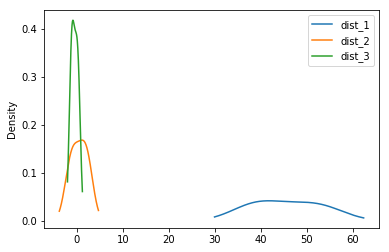

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot.density()

# One Variable At A Time:

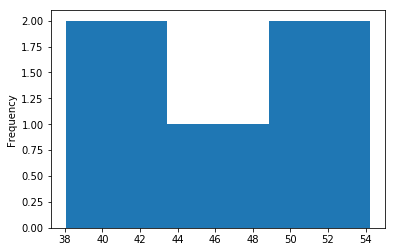

In [91]:
df.dist_1.plot.hist(bins=3)

# Real Data
### Load Data from a text separated file
* Start by googling it: http://lmgtfy.com/?q=pandas+load+csv
* Same method for comma (csv), tab (tab), |, and other separators
* Excel and R can both output spreadsheets to csv

### We will use the Big Allied and Dangerous Data from START
* https://dataverse.harvard.edu/file.xhtml?fileId=2298519&version=RELEASED&version=.0

In [95]:
baad_covars = pd.read_csv('BAAD_1_Lethality_Data.tab',sep='\t')

# Look at the data
* Also try .tail()

In [96]:
baad_covars.head(3)

,mastertccode3606,group,statespond,cowmastercountry,masterccode,fatalities19982005,OrgAge,ordsize,terrStrong,degree,ContainRelig,ContainEthno,LeftNoReligEthno,PureRelig,PureEthno,ReligEthno,ContainRelig2,ContainEthno2,Islam
0,50,Animal Liberation Front (ALF),0,United States of America,2,0,30,0,0,1,0,0,0,0,0,0,0,0,0
1,89,Army of God,0,United States of America,2,1,24,0,0,0,1,0,0,1,0,0,1,0,0
2,113,Cambodian Freedom Fighters (CFF),0,United States of America,2,0,8,0,0,0,0,1,0,0,0,0,0,1,0


# Explore the data structure

In [76]:
print(baad_covars.shape)
baad_covars.columns

(395, 19)


Index(['mastertccode3606', 'group', 'statespond', 'cowmastercountry',
       'masterccode', 'fatalities19982005', 'OrgAge', 'ordsize', 'terrStrong',
       'degree', 'ContainRelig', 'ContainEthno', 'LeftNoReligEthno',
       'PureRelig', 'PureEthno', 'ReligEthno', 'ContainRelig2',
       'ContainEthno2', 'Islam'],
      dtype='object')

# Rename things and adjust values
* Use dictionaries to rename and replace

In [77]:
baad_covars.rename(columns = {'cowmastercountry':'country',
                              'masterccode':'ccode',
                       'mastertccode3606':'group_code',
                       'fatalities19982005':'fatalities'},
            inplace = True)
baad_covars.replace({'country':{'United States of America':'US'}},
            inplace = True)
print('Dimensions: ',baad_covars.shape)
baad_covars.head()

Dimensions:  (395, 19)


,group_code,group,statespond,country,ccode,fatalities,OrgAge,ordsize,terrStrong,degree,ContainRelig,ContainEthno,LeftNoReligEthno,PureRelig,PureEthno,ReligEthno,ContainRelig2,ContainEthno2,Islam
0,50,Animal Liberation Front (ALF),0,US,2,0,30,0,0,1,0,0,0,0,0,0,0,0,0
1,89,Army of God,0,US,2,1,24,0,0,0,1,0,0,1,0,0,1,0,0
2,113,Cambodian Freedom Fighters (CFF),0,US,2,0,8,0,0,0,0,1,0,0,0,0,0,1,0
3,126,Coalition to Save the Preserves (CSP),0,US,2,0,6,0,0,0,0,0,0,0,0,0,0,0,0
4,153,Earth Liberation Front (ELF),0,US,2,0,14,0,0,1,0,0,0,0,0,0,0,0,0


# Set a useful index

In [39]:
#Set the index
baad_covars.set_index(['group_code'],inplace = True)
baad_covars.head()

,group,statespond,country,ccode,fatalities,OrgAge,ordsize,terrStrong,degree,ContainRelig,ContainEthno,LeftNoReligEthno,PureRelig,PureEthno,ReligEthno,ContainRelig2,ContainEthno2,Islam
group_code,,,,,,,,,,,,,,,,,,
50,Animal Liberation Front (ALF),0,US,2,0,30,0,0,1,0,0,0,0,0,0,0,0,0
89,Army of God,0,US,2,1,24,0,0,0,1,0,0,1,0,0,1,0,0
113,Cambodian Freedom Fighters (CFF),0,US,2,0,8,0,0,0,0,1,0,0,0,0,0,1,0
126,Coalition to Save the Preserves (CSP),0,US,2,0,6,0,0,0,0,0,0,0,0,0,0,0,0
153,Earth Liberation Front (ELF),0,US,2,0,14,0,0,1,0,0,0,0,0,0,0,0,0


# Save Your Changes
* Save it to a usable spreadsheet instead of an unreadable binary

In [78]:
baad_covars.to_csv('updated_baad.csv')

# Slicing
* Get specific values from the dataframe. 
* Pandas has several slice operators. 
  * iloc can be used to index the row by ordered integer. i.e. first row is 0, second row is 1, etc. Use this option sparingly. Better practice to use the index you have created. 
  * loc uses the named index and columns. 
* Index using [row, columns]
* Put your column names in a list
* Use : for all values
* Notice that the output keeps the index names. 

In [40]:
baad_covars.loc[:, ['fatalities']].head()

group_code
50     0
89     1
113    0
126    0
153    0
Name: fatalities, dtype: int64

# Slicing Using Conditionals
* Put conditionals in parentheses
* Stack multiple conditionals using:
  * & when both conditions must always apply
  * | when at least one condition must apply

In [41]:
baad_covars.loc[(baad_covars.fatalities>1) | (baad_covars.degree>=1),
               ['group','country']].head()

,group,country
group_code,,
50,Animal Liberation Front (ALF),US
153,Earth Liberation Front (ELF),US
30035,Maras Salvatruchas,US
10042,Group of Guerilla Combatants of Jose Maria Mor...,Mexico
246,Justice Army of the Defenseless People,Mexico


# Find a list of religious groups with territory

# Find a list of religious groups with territory

In [102]:
baad_covars.loc[(baad_covars.ContainRelig==1)&
               (baad_covars.terrStrong==1),['group']]

,group
198,Hisba
203,Lord's Resistance Army (LRA)
238,Ansar al-Islam
252,Mahdi Army
272,Hezbollah
281,Hamas
298,Hizb-I-Islami
303,Taliban
305,Islamic Movement of Uzbekistan (IMU)
356,al-Qaeda


# Plot a histogram of organization age with 20 bins

# Plot a histogram of organization age with 20 bins

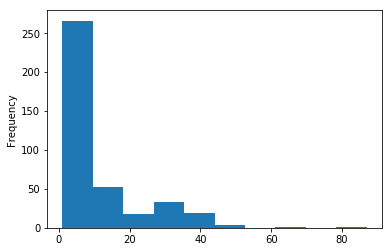

In [103]:
baad_covars.OrgAge.plot.hist(bins=10)

# Grouping By Variables
* Groupby(): List the variables to group by
* .function(): How to aggregate the rows
  * Try: .count(), .mean(), .first(), .mode()

In [83]:
state_level = baad_covars.loc[:,['country','OrgAge',
                                     'ordsize','degree',
                                    'fatalities']
                                 ].groupby(['country']).sum()
state_level.head()

,OrgAge,ordsize,degree,fatalities
country,,,,
Afghanistan,58,4,11,353
Algeria,24,2,6,409
Angola,83,5,0,276
Argentina,2,0,0,0
Bangladesh,83,5,4,80


# Handle Missing Values
### First lets make some
* Default python type: None
* Numpy datatype that can be treated like a number: np.nan
* Pandas turns None into an np.nan

In [54]:
print(type(np.nan))
baad_covars.loc[(baad_covars.fatalities>1) | (baad_covars.degree>=1),
               ['terrStrong']] = None
baad_covars.loc[(baad_covars.fatalities>1) | (baad_covars.degree>=1),
               ['terrStrong']].head()

<class 'float'>


,terrStrong
group_code,
50,NaN
153,NaN
30035,NaN
10042,NaN
246,NaN


# Handling Missing Values
### We could index by them

In [56]:
baad_covars.loc[baad_covars.terrStrong.isnull(),'terrStrong'].head()

group_code
50      NaN
153     NaN
30035   NaN
10042   NaN
246     NaN
Name: terrStrong, dtype: float64

# Handling Missing Values
### We could fill them: 

In [58]:
baad_covars['terrStrong'] = baad_covars.terrStrong.fillna(-77)
baad_covars.terrStrong.head()

group_code
50    -77.0
89      0.0
113     0.0
126     0.0
153   -77.0
Name: terrStrong, dtype: float64

# Handling Missing Values
### We could drop their rows or columns: 
* Subset is optional: which columns to look in. 
* inplace = True will drop rows in df without having to assign another variable

In [60]:
baad_covars_dropped = baad_covars.dropna(axis='index',
                                         subset=['terrStrong'],
                                        inplace=False)

# Making New Columns

### Assign values to a new column based on other columns:

In [62]:
baad_covars['big'] = 0
baad_covars.loc[(baad_covars.fatalities>1) | 
                (baad_covars.degree>=1),
               'big']=1
baad_covars.big.head()

group_code
50     1
89     0
113    0
126    0
153    1
Name: big, dtype: int64

# Reindexing: Pop the index out without losing it

In [63]:
baad_covars.reset_index(inplace=True,
                       drop = False)
baad_covars.head()

,group_code,group,statespond,country,ccode,fatalities,OrgAge,ordsize,terrStrong,degree,ContainRelig,ContainEthno,LeftNoReligEthno,PureRelig,PureEthno,ReligEthno,ContainRelig2,ContainEthno2,Islam,big
0,50,Animal Liberation Front (ALF),0,US,2,0,30,0,-77.0,1,0,0,0,0,0,0,0,0,0,1
1,89,Army of God,0,US,2,1,24,0,0.0,0,1,0,0,1,0,0,1,0,0,0
2,113,Cambodian Freedom Fighters (CFF),0,US,2,0,8,0,0.0,0,0,1,0,0,0,0,0,1,0,0
3,126,Coalition to Save the Preserves (CSP),0,US,2,0,6,0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,153,Earth Liberation Front (ELF),0,US,2,0,14,0,-77.0,1,0,0,0,0,0,0,0,0,0,1


# Set a multi-index

In [64]:
baad_covars.set_index(['group','country'],inplace = True)
baad_covars.head()

,,group_code,statespond,ccode,fatalities,OrgAge,ordsize,terrStrong,degree,ContainRelig,ContainEthno,LeftNoReligEthno,PureRelig,PureEthno,ReligEthno,ContainRelig2,ContainEthno2,Islam,big
group,country,,,,,,,,,,,,,,,,,,
Animal Liberation Front (ALF),US,50,0,2,0,30,0,-77.0,1,0,0,0,0,0,0,0,0,0,1
Army of God,US,89,0,2,1,24,0,0.0,0,1,0,0,1,0,0,1,0,0,0
Cambodian Freedom Fighters (CFF),US,113,0,2,0,8,0,0.0,0,0,1,0,0,0,0,0,1,0,0
Coalition to Save the Preserves (CSP),US,126,0,2,0,6,0,0.0,0,0,0,0,0,0,0,0,0,0,0
Earth Liberation Front (ELF),US,153,0,2,0,14,0,-77.0,1,0,0,0,0,0,0,0,0,0,1


# Using the new index, make a new dataframe
* Note the new slicing operator for multi-index

In [65]:
indonesia_grps = baad_covars.xs('Indonesia',level = 'country',drop_level=False)
indonesia_grps = indonesia_grps.loc[indonesia_grps.fatalities>=1,['degree','ContainRelig',
                                            'ContainEthno','terrStrong',
                                            'ordsize','OrgAge']]
indonesia_grps.head()

,,degree,ContainRelig,ContainEthno,terrStrong,ordsize,OrgAge
group,country,,,,,,
Free Aceh Movement (GAM),Indonesia,1,1,1,-77.0,2,31
Jemaah Islamiya (JI),Indonesia,2,1,0,-77.0,1,13
Laskar Jihad,Indonesia,3,1,1,-77.0,0,6
South Maluku Republic (RMS),Indonesia,0,0,1,-77.0,2,8


# Warning: Making copies
* If you set a variable as equal to an object, Python creates a reference rather than copying the whole object. More efficient, unless you really want to make a copy

In [66]:
little_df = pd.DataFrame([1,2,3,4,5],columns = ['A'])
little_df['B']=[0,1,0,1,1]
copied_df = little_df
print('before:')
print(copied_df)
little_df.loc[little_df.A == 3,'B'] = 7
print('after')
copied_df

before:
   A  B
0  1  0
1  2  1
2  3  0
3  4  1
4  5  1
after


,A,B
0,1,0
1,2,1
2,3,7
3,4,1
4,5,1


# What happened?
* copied_df changed when little_df changed. 
* Let's fix that: import "copy"

In [68]:
import copy
little_df = pd.DataFrame([1,2,3,4,5],columns = ['A'])
little_df['B']=[0,1,0,1,1]
copied_df = little_df.copy()
print('before:')
print(copied_df)
little_df.loc[little_df.A == 3,'B'] = 7
print('after')
copied_df

before:
   A  B
0  1  0
1  2  1
2  3  0
3  4  1
4  5  1
after


,A,B
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


# Merging and Concatenating

* Merges automatically if shared index

In [69]:
C = pd.DataFrame(['apple','orange','grape','pear','banana'],
                 columns = ['C'],
                 index = [2,4,3,0,1])
little_df['C'] = C
little_df

,A,B,C
0,1,0,pear
1,2,1,banana
2,3,7,apple
3,4,1,grape
4,5,1,orange


### Joins
* Same as SQL, inner and outer

In [84]:
C = pd.DataFrame(['apple','orange','grape','apple'],
                 columns = ['C'],
                 index = [2,4,3,'a'])
C['cuts']=['slices','wedges','whole','spirals']
print('C:')
print(C)
print('Inner: Intersection')
print(little_df.merge(right=C,
                how='inner',
                on=None,
                left_index = True,
                right_index =True))
print('Outer: Keep all rows')
print(little_df.merge(right=C,
                how='outer',
                on=None,
                left_index = True,
                right_index =True))

print('Left: Keep little_df')
print(little_df.merge(right=C,
                how='left',
                on=None,
                left_index = True,
                right_index =True))
print('Right: Keep C')
print(little_df.merge(right=C,
                how='right',
                on=None,
                left_index = True,
                right_index =True))

print('Outer, merging on column instead of index')
print(little_df.merge(right=C,
                how='outer',
                on='C',
                left_index = True,
                right_index =True))

C:
        C     cuts
2   apple   slices
4  orange   wedges
3   grape    whole
a   apple  spirals
Inner: Intersection
   A  B     C_x     C_y    cuts
2  3  7   apple   apple  slices
3  4  1   grape   grape   whole
4  5  1  orange  orange  wedges
Outer: Keep all rows
     A    B     C_x     C_y     cuts
0  1.0  0.0    pear     NaN      NaN
1  2.0  1.0  banana     NaN      NaN
2  3.0  7.0   apple   apple   slices
3  4.0  1.0   grape   grape    whole
4  5.0  1.0  orange  orange   wedges
a  NaN  NaN     NaN   apple  spirals
Left: Keep little_df
   A  B     C_x     C_y    cuts
0  1  0    pear     NaN     NaN
1  2  1  banana     NaN     NaN
2  3  7   apple   apple  slices
3  4  1   grape   grape   whole
4  5  1  orange  orange  wedges
Right: Keep C
     A    B     C_x     C_y     cuts
2  3.0  7.0   apple   apple   slices
4  5.0  1.0  orange  orange   wedges
3  4.0  1.0   grape   grape    whole
a  NaN  NaN     NaN   apple  spirals
Outer, merging on column instead of index
     A    B       C 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


### Concatenate
* Stack dataframes on top of one another
* Stack dataframes beside one another

In [85]:
add_df = pd.DataFrame({'A':[6],'B':[7],'C':'peach'},index= ['p'])
little_df = pd.concat([little_df,add_df])
little_df

,A,B,C
0,1,0,pear
1,2,1,banana
2,3,7,apple
3,4,1,grape
4,5,1,orange
p,6,7,peach


# Some New Messy Data: Asthma by Zip Code
* From California Health and Human Services <br>
https://data.chhs.ca.gov/dataset/asthma-emergency-department-visit-rates-by-zip-code
* Note: old version of data

In [107]:
asthma_data = pd.read_csv('asthma-emergency-department-visit-rates-by-zip-code.csv')
asthma_data.head(2)

,Year,ZIP code,Age Group,Number of Visits,Age-adjusted rate,County Fips code,County
0,2015,"90004\n(34.07646, -118.309453)",Children (0-17),117.0,91.7,6037,LOS ANGELES
1,2015,"90011\n(34.007055, -118.258872)",Children (0-17),381.0,102.8,6037,LOS ANGELES


### Look at those zip codes!

# Clean Zip Code
* We don't need the latitude and longitude
* Create two variables by splitting the zip code variable: 
    * index the data frame to the zip code variable
    * split it in two: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html
    * assign it to another two variables
* Remember: can't run this cell twice without starting over

In [108]:
asthma_data[['zip','coordinates']] = asthma_data.loc[:,'ZIP code'].str.split(
                                                        pat='\n',expand=True)
asthma_data.drop('ZIP code', axis=1,inplace=True)
asthma_data.head(2)

,Year,Age Group,Number of Visits,Age-adjusted rate,County Fips code,County,zip,coordinates
0,2015,Children (0-17),117.0,91.7,6037,LOS ANGELES,90004,"(34.07646, -118.309453)"
1,2015,Children (0-17),381.0,102.8,6037,LOS ANGELES,90011,"(34.007055, -118.258872)"


# Rearrange The Data: Group By
* Make child and adult separate columns rather than rows. 
* Must specify how to aggregate the columns <br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

In [109]:
asthma_grouped = asthma_data.groupby(by=['Year','zip']).sum()
asthma_grouped.head(4)

Number of Visits  Age-adjusted rate  County Fips code
Year zip                                                         
2009 90001             818.0         226.074245             18111
     90002             836.0         265.349315             18111
     90003            1542.0         369.202131             18111
     90004             580.0         145.538276             18111

### Lost Columns!  Fips summed!

# Group by: Cleaning Up
 * Lost columns you can't sum
 * took sum of fips
 * Must add these back in
 * Works because temp table has same index

In [110]:
asthma_grouped.drop('County Fips code',axis=1,inplace=True)
temp_grp = asthma_data.groupby(by=['Year','zip']).first()
asthma_grouped[['fips',
                'county',
                'coordinates']]=temp_grp.loc[:,['County Fips code',
                                                'County',
                                                'coordinates']].copy()
asthma_grouped.loc[:,'Number of Visits']=\
        asthma_grouped.loc[:,'Number of Visits']/2
asthma_grouped.head(2)

Number of Visits  Age-adjusted rate  fips       county  \
Year zip                                                             
2009 90001             409.0         226.074245  6037  LOS ANGELES   
     90002             418.0         265.349315  6037  LOS ANGELES   

                         coordinates  
Year zip                              
2009 90001  (33.973252, -118.249154)  
     90002  (33.949079, -118.247877)

# Rearrange The Data: Pivot
* Use pivot and melt to to move from row identifiers to column identifiers and back <br>
https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-melt
* Tell computer what to do with every cell:
 * Index: Stays the same
 * Columns: The column containing the new column labels
 * Values: The column containing values to insert
<img src='pivot.png'>

# Rearrange The Data: Pivot
* Tell computer what to do with every cell:
 * Index: Stays the same
 * Columns: The column containing the new column labels
 * Values: The column containing values to insert


In [111]:
asthma_unstacked = asthma_data.pivot_table(index = ['Year',
                                                    'zip',
                                                    'County',
                                                    'coordinates',
                                                    'County Fips code'], 
                                           columns = 'Age Group', 
                                           values = 'Number of Visits')
asthma_unstacked.reset_index(drop=False,inplace=True)
asthma_unstacked.head(2)

Age Group,Year,zip,County,coordinates,County Fips code,Adults (18+),All Ages,Children (0-17)
0,2009,90001,LOS ANGELES,"(33.973252, -118.249154)",6037,206.0,409.0,203.0
1,2009,90002,LOS ANGELES,"(33.949079, -118.247877)",6037,204.0,418.0,214.0


# Rename Columns, Subset Data

In [113]:
asthma_unstacked.rename(columns={
    'zip':'Zip',
    'coordinates':'Coordinates',
    'County Fips code':'Fips',
    'Adults (18+)':'Adults',
    'All Ages':'Incidents',
    'Children (0-17)': 'Children'
    },
    inplace=True)
asthma_2015 = asthma_unstacked.loc[asthma_unstacked.Year==2015,:]
asthma_2015.head(2)

Age Group,Year,Zip,County,Coordinates,Fips,Adults,Incidents,Children
4693,2015,90001,LOS ANGELES,"(33.973252, -118.249154)",6037,229.0,441.0,212.0
4694,2015,90002,LOS ANGELES,"(33.949079, -118.247877)",6037,249.0,476.0,227.0


# Save Your Data

# Save Your Data

In [114]:
asthma_2015.to_csv('asthma_2015.csv')